# IND320 - Data to Decision
**Student:** Sofie Lauvaas  
**Project:** Streamlit 4-page app with CSV visualization  

**GitHub Repository:** https://github.com/sofielauvaas/IND320_sofielauvaas_project

**Streamlit App:** https://ind320sofielauvaasproject.streamlit.app/

This notebook documents the development and usage of my Streamlit project, including CSV data analysis, plots, and reflections on the process.


## AI Usage and Collaboration

During this project, I used AI tools (like ChatGPT) to help plan, debug, and write Streamlit code. Additionally, I received guidance from a fellow student to better understand what the tasks were asking and to handle the initial setup of the Python environment and GitHub connection.

I also used AI to get drafts for the tasks. After this initial guidance, I edited and further developed the code, exploring opportunities to enhance the functionality and understanding how the process works. The AI and peer support provided a foundation, which I built upon through my own exploration and refinements.



## 1. Load CSV Data
We will read the `open-meteo-subset.csv` file using pandas.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("data/open-meteo-subset.csv")

# Quick inspection
print("Shape:", df.shape)
df.head(10)


Shape: (8760, 6)


,time,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
0,2020-01-01T00:00,-2.2,0.1,9.6,21.3,284
1,2020-01-01T01:00,-2.2,0.0,10.6,23.0,282
2,2020-01-01T02:00,-2.3,0.0,11.0,23.5,284
3,2020-01-01T03:00,-2.3,0.0,10.6,23.3,284
4,2020-01-01T04:00,-2.7,0.0,10.6,22.8,284
5,2020-01-01T05:00,-2.8,0.0,10.3,22.6,286
6,2020-01-01T06:00,-2.8,0.0,9.6,21.8,286
7,2020-01-01T07:00,-2.9,0.0,9.7,20.7,284
8,2020-01-01T08:00,-2.8,0.0,9.4,20.5,284
9,2020-01-01T09:00,-2.7,0.0,9.3,19.5,284


In [10]:
print(df.dtypes)

time                       object
temperature_2m (°C)       float64
precipitation (mm)        float64
wind_speed_10m (m/s)      float64
wind_gusts_10m (m/s)      float64
wind_direction_10m (°)      int64
dtype: object


We see that values in the time column are stored as strings. We convert it to datetime, and do this with the csv in the pages as well.

In [11]:
# Convert time column to datetime
df['time'] = pd.to_datetime(df['time'])

# print types to see the change
print(df.dtypes)


time                      datetime64[ns]
temperature_2m (°C)              float64
precipitation (mm)               float64
wind_speed_10m (m/s)             float64
wind_gusts_10m (m/s)             float64
wind_direction_10m (°)             int64
dtype: object


## 2. Summary of the data
We display descriptive statistics to understand the range, mean, and missing values in the dataset.


In [12]:
# Exclude "time" column
df_numeric = df.drop(columns=["time"])
df_numeric.describe(include="all").transpose()


,count,mean,std,min,25%,50%,75%,max
temperature_2m (°C),8760.0,-0.394909,6.711903,-19.3,-4.9,-1.0,4.1,19.9
precipitation (mm),8760.0,0.222854,0.493747,0.0,0.0,0.0,0.2,5.8
wind_speed_10m (m/s),8760.0,3.661689,2.253210,0.1,1.8,3.3,5.1,13.6
wind_gusts_10m (m/s),8760.0,8.300719,5.098909,0.2,4.5,7.7,11.5,28.7
wind_direction_10m (°),8760.0,212.209589,91.371980,0.0,128.0,238.0,292.0,360.0


There are big differences in the ranges, especially with the wind direction. We need to explore this further, potentially scale them.

## 3. Plot Each Column
Each column in the dataset is plotted individually for clarity.


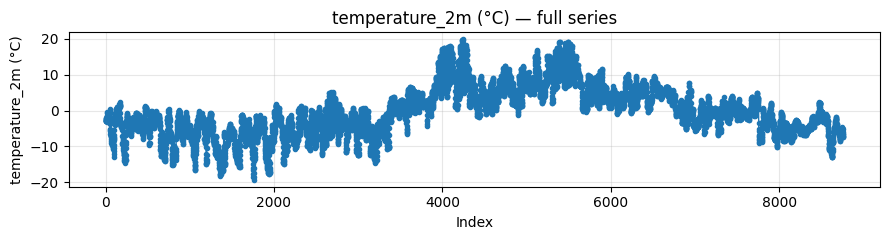

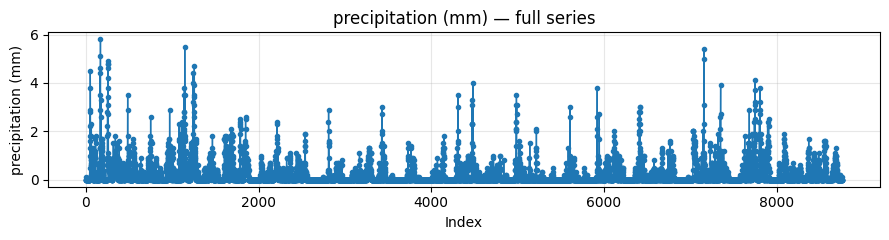

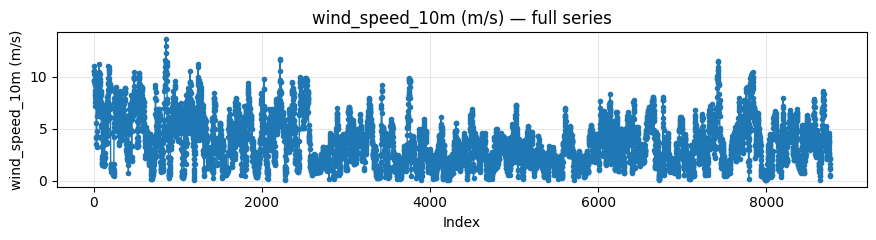

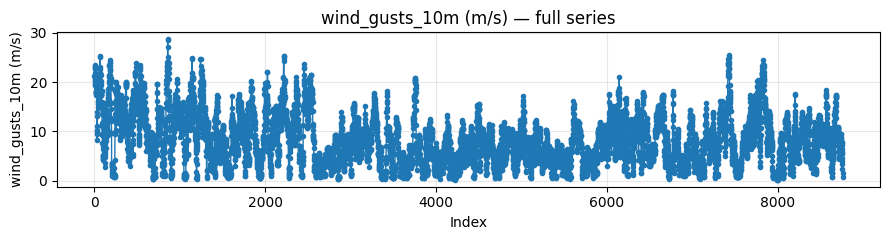

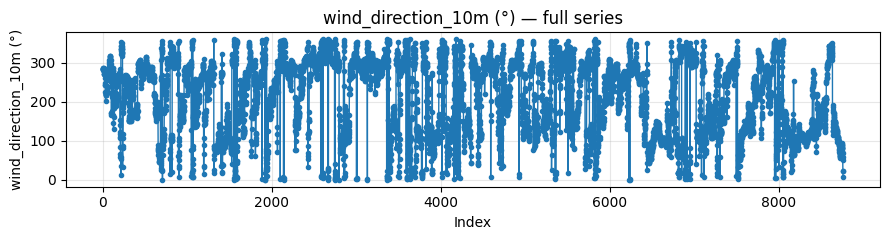

In [13]:
for col in df_numeric:
    plt.figure(figsize=(9,2.5))
    plt.plot(df.index, df[col], marker=".", linewidth=1)
    plt.title(f"{col} — full series")
    plt.xlabel("Index")
    plt.ylabel(col)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


We can also see here we can see the very different scales.

## 4. Plot All Columns Together
Since columns may have different scales, we normalize them between 0 and 1.


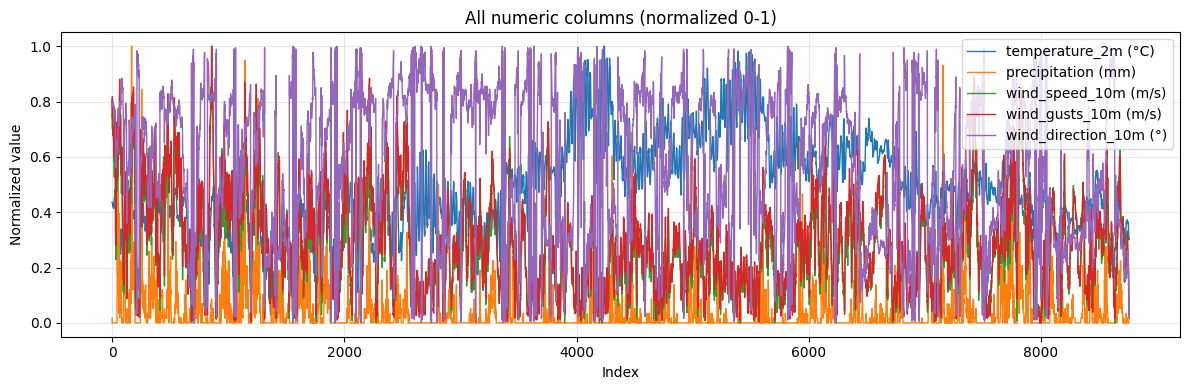

In [14]:
# Normalize numeric columns
df_norm = (df_numeric - df_numeric.min()) / (df_numeric.max() - df_numeric.min())

# Plot all numeric columns
plt.figure(figsize=(12,4))
for col in df_norm.columns:
    plt.plot(df_norm.index, df_norm[col], label=col, linewidth=1)

plt.legend(loc="upper right")
plt.title("All numeric columns (normalized 0-1)")
plt.xlabel("Index")
plt.ylabel("Normalized value")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


We will add in the possibility to get the plots normalized in the Plot Page.

## 5. Streamlit App Overview

The project also includes a Streamlit 4-page app:

1. **Home Page**: Title and description.
2. **Data Table Page**: Shows the full dataset and sparklines for the first month of each column.
3. **Plot Page**: Interactive plots with dropdown to select columns and a slider to select a time range.
4. **About Page**: Documentation and reflections.

The app is live at: https://ind320sofielauvaasproject.streamlit.app/
The code is hosted on GitHub: https://github.com/sofielauvaas/IND320_sofielauvaas_project

## Reflection / Log

Overall, this project has been a highly valuable learning experience, combining both technical challenges and creative problem-solving. I found the initial setup particularly challenging, especially managing Python environments, setting up Conda/venv, and connecting Streamlit to GitHub. At first, it was difficult to navigate all the configuration steps, but receiving guidance from a fellow student and support from AI tools made it much more manageable and allowed me to move forward with confidence.

Once the setup was complete, I really enjoyed the coding and visualization parts. Working with the CSV data and exploring its contents through both the Jupyter Notebook and Streamlit app was very engaging. Building the interactive Streamlit app, with multiple pages and dynamic visualizations, made it exciting to see the data in different ways and experiment with user interface features like dropdowns, sliders, and sidebar navigation. It was rewarding to watch the app respond to selections and update plots in real time.

Through this project, I learned several key skills: how to structure a multipage Streamlit app effectively, how to read, inspect, and visualize data using Pandas and Streamlit functions. Beyond the technical aspects, I learned the importance of iterative development—testing ideas, making refinements, and documenting decisions in the notebook so that the project remains understandable and reproducible.

This project also highlighted the value of collaboration and external support. Using AI tools and guidance from a fellow student helped me understand the tasks and initial setup, while allowing me to take ownership of the further development and enhancements. Exploring solutions on my own built confidence and gave me a better understanding of how all the pieces—data, code, and interactive visualization—fit together.

Overall, this experience has strengthened my Python skills, improved my ability to create interactive visualizations, and enhanced my understanding of project workflow and documentation. I feel more comfortable combining notebooks and interactive apps, and I now have a clearer idea of how to structure, test, and present a data-driven project effectively.

I still look forward to further learn more about this, as I still feel like it could have gotten more of a personal touch. I will work more with this in further CA projects, exploring more functionalities.
